In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Here I am importing the csv file which holds the hourly DA prices for the BZ DE
BZDEDA2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_DE_20210101-20211231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZDEDA2021 = BZDEDA2021.replace('n/e', np.NaN)
BZDEDA2021 = BZDEDA2021.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZDEDA2021 = {'MTU (CET/CEST)': BZDEDA2021.iloc[:,0],
    'DAPrice': BZDEDA2021.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZDEDA2021['DAPrice'] = pd.to_numeric(BZDEDA2021['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZDEDA2021 = pd.DataFrame(BZDEDA2021)
print(BZDEDA2021.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2021 00:00 - 01.01.2021 01:00    50.87
1     01.01.2021 01:00 - 01.01.2021 02:00    48.19
2     01.01.2021 02:00 - 01.01.2021 03:00    44.68
3     01.01.2021 03:00 - 01.01.2021 04:00    42.92
4     01.01.2021 04:00 - 01.01.2021 05:00    40.39
5     01.01.2021 05:00 - 01.01.2021 06:00    40.20
6     01.01.2021 06:00 - 01.01.2021 07:00    39.63
7     01.01.2021 07:00 - 01.01.2021 08:00    40.09
8     01.01.2021 08:00 - 01.01.2021 09:00    41.27
9     01.01.2021 09:00 - 01.01.2021 10:00    44.88
10    01.01.2021 10:00 - 01.01.2021 11:00    45.00
11    01.01.2021 11:00 - 01.01.2021 12:00    47.20
12    01.01.2021 12:00 - 01.01.2021 13:00    50.78
13    01.01.2021 13:00 - 01.01.2021 14:00    45.49
14    01.01.2021 14:00 - 01.01.2021 15:00    44.73
15    01.01.2021 15:00 - 01.01.2021 16:00    46.59
16    01.01.2021 16:00 - 01.01.2021 17:00    52.99
17    01.01.2021 17:00 - 01.01.2021 18:00    60.26
18    01.01.2021 18:00 - 01.01.

In [9]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZDEDA2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = BZDEDA2021.iloc[start,0]
            operation = statistics.mean(BZDEDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 86:
            start = 24*i
            skip = 2066
            end = 2088
            a = sum(BZDEDA2021.iloc[start:skip,1])
            b = sum(BZDEDA2021.iloc[skip+1:end,1])
            day = BZDEDA2021.iloc[start,0]
            operation = (a+b)/(len(BZDEDA2021.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = BZDEDA2021.iloc[start,0]
            operation = statistics.mean(BZDEDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 303:
            start = 24*i
            end = 7297
            day = BZDEDA2021.iloc[start,0]
            operation = statistics.mean(BZDEDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZDEDA2021.iloc[start,0]
            operation = statistics.mean(BZDEDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZDEDA2021Daily = function()
BZDEDA2021Daily["Daily DA"] = BZDEDA2021Daily["Daily DA"].round(2)
print(BZDEDA2021Daily.to_string())

                                     Day  Daily DA
0    01.01.2021 00:00 - 01.01.2021 01:00     48.40
1    02.01.2021 00:00 - 02.01.2021 01:00     50.56
2    03.01.2021 00:00 - 03.01.2021 01:00     38.62
3    04.01.2021 00:00 - 04.01.2021 01:00     48.02
4    05.01.2021 00:00 - 05.01.2021 01:00     55.34
5    06.01.2021 00:00 - 06.01.2021 01:00     52.68
6    07.01.2021 00:00 - 07.01.2021 01:00     70.93
7    08.01.2021 00:00 - 08.01.2021 01:00     78.34
8    09.01.2021 00:00 - 09.01.2021 01:00     59.32
9    10.01.2021 00:00 - 10.01.2021 01:00     52.16
10   11.01.2021 00:00 - 11.01.2021 01:00     48.15
11   12.01.2021 00:00 - 12.01.2021 01:00     46.10
12   13.01.2021 00:00 - 13.01.2021 01:00     42.47
13   14.01.2021 00:00 - 14.01.2021 01:00     70.58
14   15.01.2021 00:00 - 15.01.2021 01:00     72.89
15   16.01.2021 00:00 - 16.01.2021 01:00     55.85
16   17.01.2021 00:00 - 17.01.2021 01:00     54.00
17   18.01.2021 00:00 - 18.01.2021 01:00     55.95
18   19.01.2021 00:00 - 19.01.2

In [10]:
BZDEDA2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_DE_20220101-20221231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZDEDA2022 = BZDEDA2022.replace('n/e', np.NaN)
BZDEDA2022 = BZDEDA2022.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZDEDA2022 = {'MTU (CET/CEST)': BZDEDA2022.iloc[:,0],
    'DAPrice': BZDEDA2022.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZDEDA2022['DAPrice'] = pd.to_numeric(BZDEDA2022['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZDEDA2022 = pd.DataFrame(BZDEDA2022)
print(BZDEDA2022.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2022 00:00 - 01.01.2022 01:00    50.05
1     01.01.2022 01:00 - 01.01.2022 02:00    41.33
2     01.01.2022 02:00 - 01.01.2022 03:00    43.22
3     01.01.2022 03:00 - 01.01.2022 04:00    45.46
4     01.01.2022 04:00 - 01.01.2022 05:00    37.67
5     01.01.2022 05:00 - 01.01.2022 06:00    39.70
6     01.01.2022 06:00 - 01.01.2022 07:00    40.59
7     01.01.2022 07:00 - 01.01.2022 08:00    43.26
8     01.01.2022 08:00 - 01.01.2022 09:00    49.66
9     01.01.2022 09:00 - 01.01.2022 10:00    70.05
10    01.01.2022 10:00 - 01.01.2022 11:00    76.79
11    01.01.2022 11:00 - 01.01.2022 12:00    84.10
12    01.01.2022 12:00 - 01.01.2022 13:00    94.74
13    01.01.2022 13:00 - 01.01.2022 14:00    96.80
14    01.01.2022 14:00 - 01.01.2022 15:00    97.17
15    01.01.2022 15:00 - 01.01.2022 16:00   101.00
16    01.01.2022 16:00 - 01.01.2022 17:00   126.60
17    01.01.2022 17:00 - 01.01.2022 18:00   149.97
18    01.01.2022 18:00 - 01.01.

In [11]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZDEDA2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = BZDEDA2022.iloc[start,0]
            operation = statistics.mean(BZDEDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            a = sum(BZDEDA2022.iloc[start:skip,1])
            b = sum(BZDEDA2022.iloc[skip+1:end,1])
            day = BZDEDA2022.iloc[start,0]
            operation = (a+b)/(len(BZDEDA2022.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = BZDEDA2022.iloc[start,0]
            operation = statistics.mean(BZDEDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 302:
            start = 24*i
            end = 7273
            day = BZDEDA2022.iloc[start,0]
            operation = statistics.mean(BZDEDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZDEDA2022.iloc[start,0]
            operation = statistics.mean(BZDEDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZDEDA2022Daily = function()
BZDEDA2022Daily["Daily DA"] = BZDEDA2022Daily["Daily DA"].round(2)
print(BZDEDA2022Daily.to_string())

                                     Day  Daily DA
0    01.01.2022 00:00 - 01.01.2022 01:00     82.58
1    02.01.2022 00:00 - 02.01.2022 01:00     47.35
2    03.01.2022 00:00 - 03.01.2022 01:00     76.11
3    04.01.2022 00:00 - 04.01.2022 01:00    153.92
4    05.01.2022 00:00 - 05.01.2022 01:00    107.87
5    06.01.2022 00:00 - 06.01.2022 01:00    194.10
6    07.01.2022 00:00 - 07.01.2022 01:00    167.18
7    08.01.2022 00:00 - 08.01.2022 01:00    165.90
8    09.01.2022 00:00 - 09.01.2022 01:00    146.56
9    10.01.2022 00:00 - 10.01.2022 01:00    261.55
10   11.01.2022 00:00 - 11.01.2022 01:00    255.41
11   12.01.2022 00:00 - 12.01.2022 01:00    233.32
12   13.01.2022 00:00 - 13.01.2022 01:00    180.16
13   14.01.2022 00:00 - 14.01.2022 01:00    178.76
14   15.01.2022 00:00 - 15.01.2022 01:00    216.00
15   16.01.2022 00:00 - 16.01.2022 01:00    133.10
16   17.01.2022 00:00 - 17.01.2022 01:00    129.31
17   18.01.2022 00:00 - 18.01.2022 01:00    235.87
18   19.01.2022 00:00 - 19.01.2

In [12]:
BZDE = pd.concat([BZDEDA2021Daily["Daily DA"], BZDEDA2022Daily["Daily DA"]], ignore_index=True).to_frame("BZN|DE")

BZDE["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|DE"]

#BZGBDAdata["Date"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
BZDE = BZDE.reindex(columns=NewOrder)

BZDE

,Date,BZN|DE
0,2021-01-01,48.40
1,2021-01-02,50.56
2,2021-01-03,38.62
3,2021-01-04,48.02
4,2021-01-05,55.34
...,...,...
725,2022-12-27,91.73
726,2022-12-28,45.90
727,2022-12-29,13.58
728,2022-12-30,14.63


<class 'pandas.core.series.Series'>


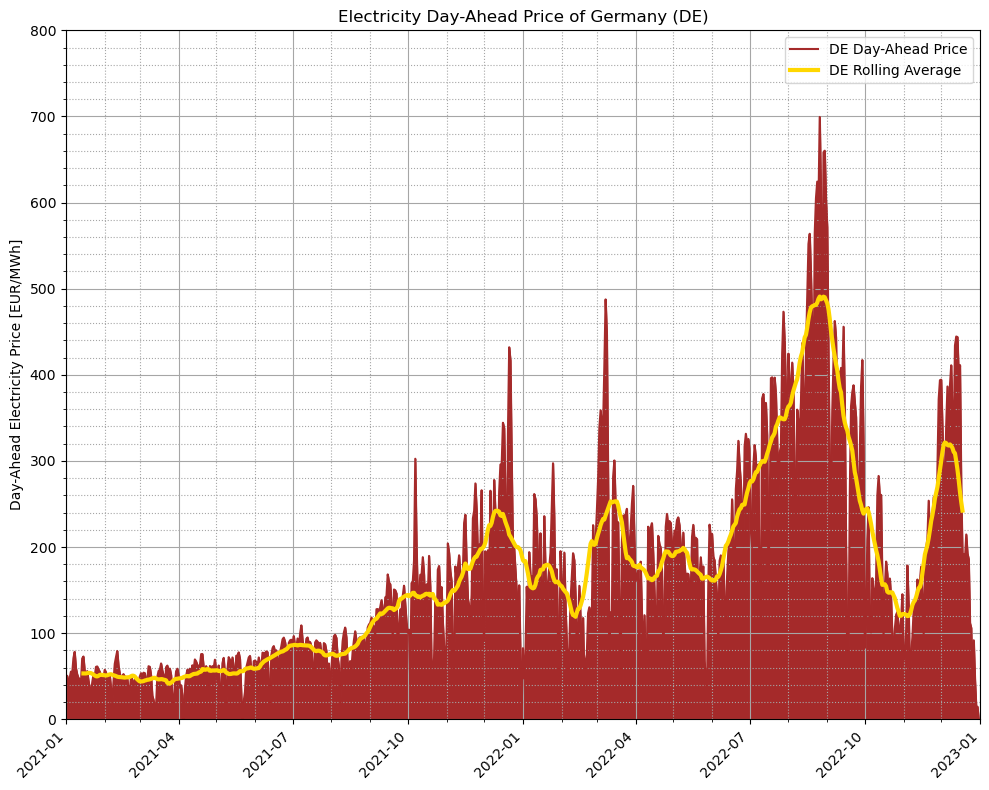

(18628.0, 19358.0)


In [13]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

print(type(BZDE["BZN|DE"]))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Electricity Day-Ahead Price of Germany (DE)')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.plot(BZDE["Date"], BZDE["BZN|DE"], color = "brown", label="DE Day-Ahead Price")
ax.plot(BZDE["Date"], BZDE["BZN|DE"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="DE Rolling Average")
plt.fill_between(BZDE["Date"], BZDE["BZN|DE"].astype(float), color="brown")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#n = 30
#ax.xaxis.set_minor_locator(plt.MultipleLocator(n-3))
#ax.xaxis.set_major_locator(plt.MultipleLocator(n))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

In [14]:
%store BZDE
del BZDE

Stored 'BZDE' (DataFrame)
